<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code>replace with your group id here</code><b>

<b>Group Members:</b>  

1. <code>Deep_Pravinbhai_B00938094</code>
2. <code>Kush_B00928066</code>


# 1. Dataset Information

<h4> Dataset Name: <code> Hollywood Dataset</code></h4>
<h4> Link to the Dataset: <code>https://drive.google.com/drive/folders/15UrPcUjKgPXrTf6uEsNjU3mB3CQGIk_r?usp=drive_link</code> </h4>
<h4> Dataset Description: </h4>
<code> The Hollywood Actors and Actresses Image Dataset is a comprehensive collection of 13,372 images showcasing 106 prominent figures from the entertainment industry. The dataset encompasses a diverse range of actors and actresses, providing a rich resource for various computer vision and machine learning applications.<br/> <br/>
<b>Data Collection:</b>
The dataset was meticulously curated using the "Image Downloader - Image Finder" Chrome extension, a tool designed for efficient bulk image scraping. Images were gathered at a resolution of 128x128 pixels and higher, ensuring a sufficient level of detail for analysis. On average, each individual actor or actress is represented by a substantial collection ranging from 90 to 180 images.<br/><br/>
<b>Organizational Structure:</b>
To enhance accessibility and ease of use, the dataset is structured in a systematic manner. Each actor's or actress's images are organized into individual folders, with each folder named after the respective personality. This hierarchical organization facilitates seamless navigation and retrieval of specific data, promoting an efficient workflow for researchers and developers.<br/><br/>
<b>Actor Diversity:</b>
The dataset features a diverse array of Hollywood actors and actresses, encompassing various genres, age groups, and career stages. This diversity allows for robust model training and testing across a wide spectrum of visual characteristics.

 </code>


# 2. Task Information

<h4> Task Goal: <code> Identifying and classifying Bollywood actors and actress from facial images </code></h4>
<h4> Task Description: </h4>
    <code> To enhance data quality, manual cleaning is conducted to eliminate misclassified images associated with specific individuals from Bollywood. Duplicate removal is carried out through a two-step process: first, exact duplicates are identified using hash functions, and then similar images are eliminated based on the Z transformation using dhash.<br/><br/>
    To address class imbalance and reduce overfitting, data points are strategically reduced through random data selection and/or class elimination.<br/><br/>
    The classification task utilizes multiple machine learning models:<br/>
    <b>CNN (Convolutional Neural Network)</b>: Beneficial for image classification due to its ability to capture spatial hierarchies and patterns in images.<br/>
    <b>SVM (Support Vector Machine)</b>: Effective for binary and multiclass classification, SVMs are known for their versatility and robust performance.<br/>
    <b>Linear Regression</b>: Though primarily used for regression tasks, it can be applied to binary classification problems and serves as a baseline model for comparison.<br/>
    <b>Random Forest</b>: A versatile ensemble learning algorithm, beneficial for handling large datasets with high dimensionality and capturing complex relationships.<br/><br/>
    Evaluation involves assessing classification results and scores, comparing the performance of different models to determine the most effective approach for the given image classification task.</code>

# 3. Task Implementation: Coding

### 3.1 Preprocessing

In [2]:
import pandas as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [99]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
PATH_TO_HOLLYWOOD="./hollywood"
PATH_TO_HOLLYWOOD_CROP="/Users/kushsutaria/Downloads/cropped"

In [6]:
img1=cv2.imread("/Users/kushsutaria/Downloads/cropped/Alexandra Daddario/Alexandra Daddario1.jpeg")

#### Applying Cropping Techniques on Single Image

In [7]:
img1.shape

(92, 92, 3)

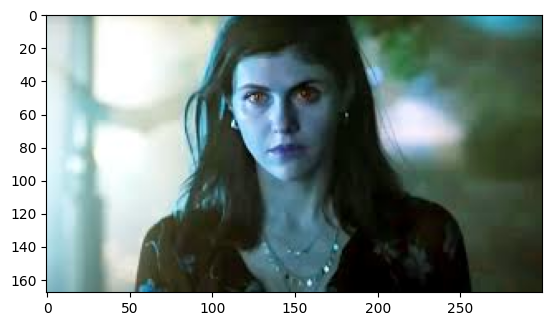

In [ ]:
plt.imshow(img1)

In [104]:
gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

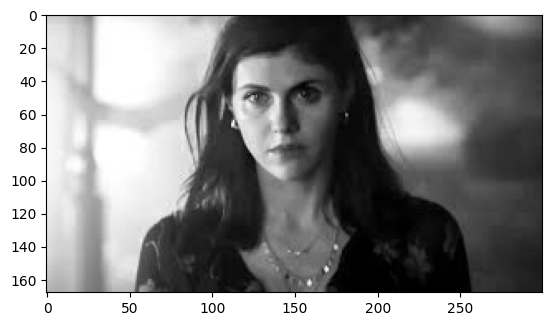

In [105]:
plt.imshow(gray,cmap='gray')

In [9]:
faceCascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml');

[ERROR:0@37.687] global persistence.cpp:512 open Can't open file: './haarcascades/haarcascade_frontalface_default.xml' in read mode


In [10]:
eyeCascade= cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

[ERROR:0@39.186] global persistence.cpp:512 open Can't open file: './haarcascades/haarcascade_eye.xml' in read mode


In [108]:
face1=faceCascade.detectMultiScale(gray,1.3,5)

In [109]:
face1

array([[103,  18,  81,  81]], dtype=int32)

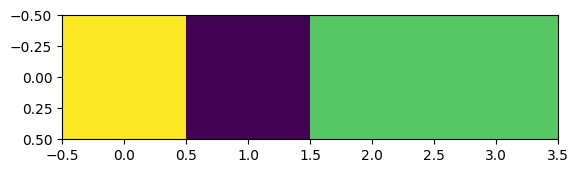

In [110]:
plt.imshow(face1)

In [111]:
x,y,w,h=face1[0]

In [112]:
face_img=cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)

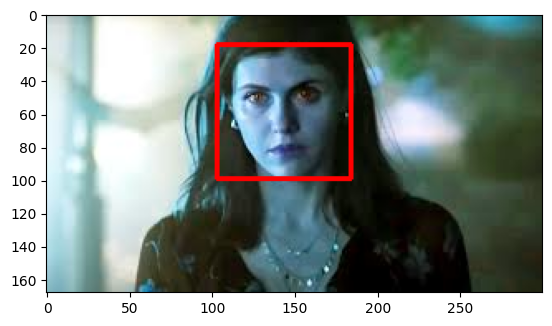

In [113]:
plt.imshow(face_img)

**Descriptive Analysis:**

Plot shows the bounding box over the detected face in the image

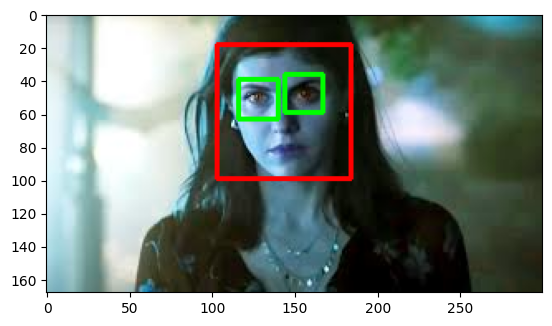

In [114]:
cv2.destroyAllWindows()
for (x,y,w,h) in face1:
    face_img = cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eyeCascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

**Descriptive Analysis:**

Plot shows the dimesion eye detection and creating green bound boxes for the same

In [115]:
def get_cropped_faces(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print("Error: Unable to load the image. Please check the file path.", image_path)
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.2, 4)
    roi_colors = []
    for (x,y,w,h) in faces:
        print("faces detected:", len(faces))
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyeCascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            roi_colors.append(roi_color)
    return roi_colors

**Descriptive Analysis:**

Funtion to get cropped image for the provided image path. It finds the all the detected faces and returns an array of images for the same

In [116]:
cropped_faces = get_cropped_faces("./hollywood/Alexandra Daddario/13.jpeg")

faces detected: 1


In [117]:
cropped_faces

[array([[[ 68, 143, 157],
         [ 47, 112, 120],
         [ 45,  88,  91],
         ...,
         [ 17,  18,   9],
         [ 17,  18,   9],
         [ 15,  18,   9]],
 
        [[ 61, 132, 142],
         [ 41,  96, 103],
         [ 44,  77,  80],
         ...,
         [ 17,  18,   9],
         [ 17,  18,   9],
         [ 15,  18,   9]],
 
        [[ 53, 115, 125],
         [ 37,  84,  88],
         [ 45,  70,  72],
         ...,
         [ 17,  18,   9],
         [ 17,  18,   9],
         [ 15,  18,   9]],
 
        ...,
 
        [[ 37,  49,  27],
         [ 38,  49,  29],
         [ 38,  48,  31],
         ...,
         [  8,  14,   3],
         [  9,  15,   4],
         [ 10,  16,   5]],
 
        [[ 37,  48,  32],
         [ 37,  50,  34],
         [ 36,  51,  37],
         ...,
         [ 15,  18,   9],
         [ 12,  15,   6],
         [  9,  12,   3]],
 
        [[ 35,  48,  34],
         [ 35,  52,  38],
         [ 37,  54,  41],
         ...,
         [ 14,  17,   8],
  

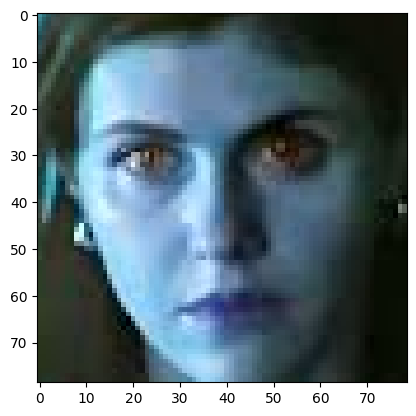

In [118]:
plt.imshow(cropped_faces[0])

**Descriptive Analysis:**

Plot shows the final cropped image.

#### Generating Cropped Images

In [119]:
import os

def get_image_dir(dir_path):
  img_dirs = []
  for entry in os.scandir(dir_path):
      if entry.is_dir():
          img_dirs.append(entry.path)
  return img_dirs

**Descriptive Analysis:**

A function to return image directories provided the root directory path

In [120]:
import shutil

def create_cropped_dir_if_absent(dir_path):
  if os.path.exists(dir_path):
      shutil.rmtree(dir_path)

  os.mkdir(dir_path)

**Descriptive Analysis:**

Function creates cropped directory if absent to store all cropped images for actors and actress'

In [121]:
def get_cropped_faces_w_gs(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print("Error: Unable to load the image. Please check the file path.", image_path)
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    for scale_factor in [1.2, 1.3, 1.4]:
        for min_neighbors in [3, 4, 5]:
            faces = faceCascade.detectMultiScale(gray, scaleFactor=scale_factor, minNeighbors=min_neighbors)
            roi_colors = []
            for (x, y, w, h) in faces:
                print("Faces detected:", len(faces))
                roi_gray = gray[y:y + h, x:x + w]
                roi_color = img[y:y + h, x:x + w]
                eyes = eyeCascade.detectMultiScale(roi_gray)
                if len(eyes) >= 2:
                    roi_colors.append(roi_color)
            # print(f"Scale Factor: {scale_factor}, Min Neighbors: {min_neighbors}, Detected Faces: {len(faces)}")
    return roi_colors

**Descriptive Analysis:**

The function performs grid serach to maximize the numbers of faces detected from a given image. It tunes `scaleFactor` and `minNeighours`

In [122]:
def generate_croppped_data(data_path, cropped_data_path):

  image_dirs = get_image_dir(data_path)
  create_cropped_dir_if_absent(cropped_data_path)

  cropped_image_dirs = []
  celeb_file_names_dict = {}
  total_count = 1
  for img_dir in image_dirs:
      count = 1
      celebrity_name = img_dir.split('/')[-1]
      if(celebrity_name == "cropped"):
          return [image_dirs, cropped_image_dirs]
      print("Celebrity:\t", celebrity_name)
      print("----------------------------------------------")

      celeb_file_names_dict[celebrity_name] = []

      for entry in os.scandir(img_dir):
          extension = entry.name.split('.')[-1]
          # change function here
          roi_colors = get_cropped_faces_w_gs(entry.path)
          if roi_colors is not None:
              cropped_folder = cropped_data_path + "/" + celebrity_name
              if not os.path.exists(cropped_folder):
                  os.makedirs(cropped_folder)
                  cropped_image_dirs.append(cropped_folder)
                  print("Generating cropped images in folder: ",cropped_folder)
              for roi_color in roi_colors:
                  cropped_file_name = celebrity_name + str(count) + "." + extension
                  cropped_file_path = cropped_folder + "/" + cropped_file_name
                  # print("cropped_file_path", cropped_file_name)
                  # print("cropped_file_path", cropped_file_path)
                  cv2.imwrite(cropped_file_path, roi_color)
                  celeb_file_names_dict[celebrity_name].append(cropped_file_path)
                  count += 1
      total_count += count
      print("Total faces:", total_count)

  return [image_dirs, cropped_image_dirs]

**Descriptive Analysis:**

This function generates cropped images from all the dataset by providing root directory path of dataset and path to store cropped data.

In [123]:
hollywood_img_dirs, cr_hollywood_img_dirs = generate_croppped_data(PATH_TO_HOLLYWOOD, PATH_TO_HOLLYWOOD_CROP)

In [124]:
hollywood_img_dirs

In [125]:
hollywood_img_dirs_gs, cr_hollywood_img_dirs_gs = generate_croppped_data(PATH_TO_HOLLYWOOD, PATH_TO_HOLLYWOOD_CROP)

**Descriptive Analysis:**

Cropped images are generated after this step. They need to be manually cleaned to match desired class labels.

In [11]:
pre_processed_hollywood_path="/Users/kushsutaria/Downloads/cropped/"

In [127]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

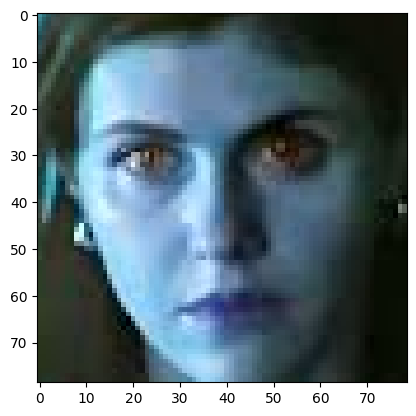

In [128]:
plt.imshow(cropped_faces[0])

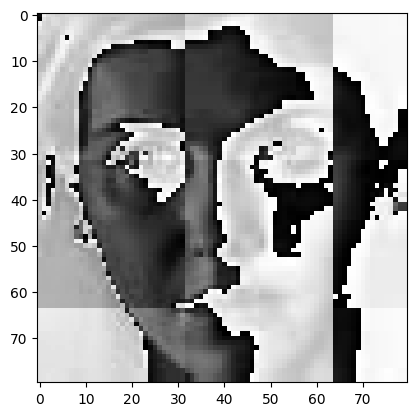

In [129]:
image=cropped_faces[0]
im_har = w2d(image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [12]:
import os
img_dirs = []
for entry in os.scandir(pre_processed_hollywood_path):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [13]:
img_dirs

['/Users/kushsutaria/Downloads/cropped/Rebecca Ferguson',
 '/Users/kushsutaria/Downloads/cropped/Mary Elizabeth Winstead',
 '/Users/kushsutaria/Downloads/cropped/Florence Pugh',
 '/Users/kushsutaria/Downloads/cropped/Shelley Hennig',
 '/Users/kushsutaria/Downloads/cropped/Taylor Momsen',
 '/Users/kushsutaria/Downloads/cropped/robert downey jr',
 '/Users/kushsutaria/Downloads/cropped/Kristoffer Polaha',
 '/Users/kushsutaria/Downloads/cropped/steve carell',
 '/Users/kushsutaria/Downloads/cropped/Mckenna Grace',
 '/Users/kushsutaria/Downloads/cropped/Anna Faris',
 '/Users/kushsutaria/Downloads/cropped/Kelly Reilly',
 '/Users/kushsutaria/Downloads/cropped/Gemma Chan',
 '/Users/kushsutaria/Downloads/cropped/Karen Gillan',
 '/Users/kushsutaria/Downloads/cropped/Jessica Camacho',
 '/Users/kushsutaria/Downloads/cropped/john krasinski',
 '/Users/kushsutaria/Downloads/cropped/Jacob Elordi',
 '/Users/kushsutaria/Downloads/cropped/Elizabeth Debicki',
 '/Users/kushsutaria/Downloads/cropped/Carrie C

In [14]:
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Rebecca Ferguson': ['/Users/kushsutaria/Downloads/cropped/Rebecca Ferguson/Rebecca Ferguson39.jpeg',
  '/Users/kushsutaria/Downloads/cropped/Rebecca Ferguson/Rebecca Ferguson42.jpeg',
  '/Users/kushsutaria/Downloads/cropped/Rebecca Ferguson/Rebecca Ferguson15.jpeg',
  '/Users/kushsutaria/Downloads/cropped/Rebecca Ferguson/Rebecca Ferguson35.jpeg',
  '/Users/kushsutaria/Downloads/cropped/Rebecca Ferguson/Rebecca Ferguson23.jpeg',
  '/Users/kushsutaria/Downloads/cropped/Rebecca Ferguson/Rebecca Ferguson19.jpeg',
  '/Users/kushsutaria/Downloads/cropped/Rebecca Ferguson/Rebecca Ferguson18.jpeg',
  '/Users/kushsutaria/Downloads/cropped/Rebecca Ferguson/.DS_Store',
  '/Users/kushsutaria/Downloads/cropped/Rebecca Ferguson/Rebecca Ferguson22.jpeg',
  '/Users/kushsutaria/Downloads/cropped/Rebecca Ferguson/Rebecca Ferguson34.jpeg',
  '/Users/kushsutaria/Downloads/cropped/Rebecca Ferguson/Rebecca Ferguson14.jpeg',
  '/Users/kushsutaria/Downloads/cropped/Rebecca Ferguson/Rebecca Ferguson43.jpeg'

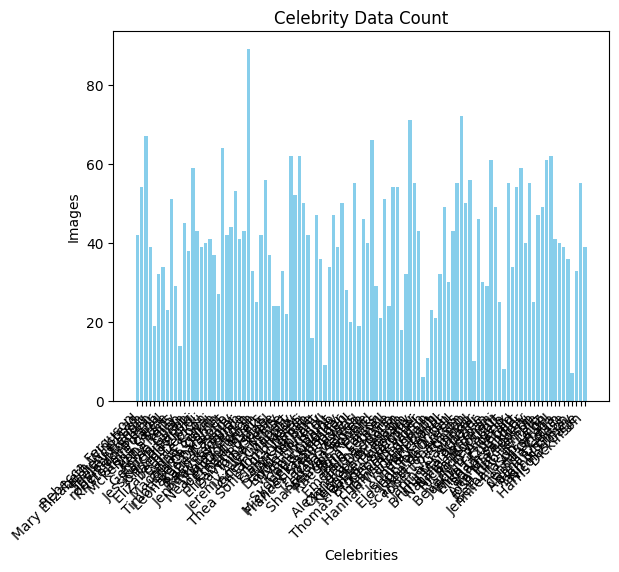

<Figure size 1000x2000 with 0 Axes>

In [15]:
celebrities = list(celebrity_file_names_dict.keys())
img_count = [len(images) for images in celebrity_file_names_dict.values()]

plt.bar(celebrities, img_count, color='skyblue')
plt.xlabel('Celebrities')
plt.ylabel('Images')
plt.title('Celebrity Data Count')
plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(10, 20))
# Display the plot
plt.show()

**Descriptive Analysis:**

Plot shows the classwise no. of image distribution. The class with less images *Raijinkanth* and *Ajith Kumar* can be dropped.

In [134]:
indices_less_than_25 = [i for i, value in enumerate(img_count) if value < 25]
indices_less_than_25

[4, 7, 10, 32, 33, 35, 41, 44, 50, 52, 57, 59, 62, 67, 68, 69, 70, 79, 86, 102]

In [135]:
filtered_celebrity_file_names_dict = {key: value for key, value in celebrity_file_names_dict.items() if key not in indices_less_than_25}
filtered_celebrity_file_names_dict

{'Rebecca Ferguson': ['./pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson39.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson42.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson15.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson35.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson23.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson19.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson18.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/.DS_Store',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson22.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson34.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson14.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson43.jpeg',
  './pre_processed_hollywood/cropp

In [16]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Rebecca Ferguson': 0,
 'Mary Elizabeth Winstead': 1,
 'Florence Pugh': 2,
 'Shelley Hennig': 3,
 'Taylor Momsen': 4,
 'robert downey jr': 5,
 'Kristoffer Polaha': 6,
 'steve carell': 7,
 'Mckenna Grace': 8,
 'Anna Faris': 9,
 'Kelly Reilly': 10,
 'Gemma Chan': 11,
 'Karen Gillan': 12,
 'Jessica Camacho': 13,
 'john krasinski': 14,
 'Jacob Elordi': 15,
 'Elizabeth Debicki': 16,
 'Carrie Coon': 17,
 'Anna Sawai': 18,
 'Macaulay Culkin': 19,
 'Emma Corrin': 20,
 'Timothée Chalamet': 21,
 'Leonardo DiCaprio': 22,
 'Katie Cassidy': 23,
 'Rachel Zegler': 24,
 'Barry Keoghan': 25,
 'Jennifer Lawrence': 26,
 'Kaley Cuoco': 27,
 'Neal McDonough': 28,
 'Joel Kinnaman': 29,
 'Emma Myers': 30,
 'Elizabeth Banks': 31,
 'David Rysdahl': 32,
 'Tom Cruise': 33,
 'Joe Keery': 34,
 'Jeremy Allen White': 35,
 'Lacey Chabert': 36,
 'Cillian Murphy': 37,
 'Tom Hardy': 38,
 'Thea Sofie Loch Næss': 39,
 'Taika Waititi': 40,
 'Gary Oldman': 41,
 'Alison Brie': 42,
 'David Tennant': 43,
 'Eddie Murphy': 44,

#### Pre-processing After Manual Data Cleaning




##### Reducing Data Redundancy

In [137]:
import hashlib

In [138]:
def get_file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

**Descriptive Analysis:**

Function to get md5 hash after reading the image

In [139]:
# [Removing Duplicate Images through Python](https://medium.com/@urvisoni/removing-duplicate-images-through-python-23c5fdc7479e)
duplicates = []
hash_keys = dict()
for celebrity, image_paths in filtered_celebrity_file_names_dict.items():
    for path in image_paths:
      if os.path.isfile(path):
          with open(path, 'rb') as f:
              filehash = hashlib.md5(f.read()).hexdigest()
          if filehash not in hash_keys:
              hash_keys[filehash] = celebrity
          else:
              duplicates.append((celebrity,hash_keys[filehash], path))

**Descriptive Analysis:**

This gives an array `duplicates` where the duplicate images from the cropped images are found.

In [140]:
duplicates

[('Tom Cruise',
  'Timothée Chalamet',
  './pre_processed_hollywood/cropped/Tom Cruise/Tom Cruise28.jpeg'),
 ('chris evans',
  'chris evans',
  './pre_processed_hollywood/cropped/chris evans/chris evans12.jpeg'),
 ('Emerald Fennell',
  'Emerald Fennell',
  './pre_processed_hollywood/cropped/Emerald Fennell/Emerald Fennell8.jpeg')]

**Descriptive Analysis:**

Provided images are removed from the cropped dataset.

In [17]:
os.listdir(pre_processed_hollywood_path)

['Rebecca Ferguson',
 'Mary Elizabeth Winstead',
 'Florence Pugh',
 'Shelley Hennig',
 'Taylor Momsen',
 'robert downey jr',
 'Kristoffer Polaha',
 'steve carell',
 'Mckenna Grace',
 'Anna Faris',
 'Kelly Reilly',
 'Gemma Chan',
 'Karen Gillan',
 'Jessica Camacho',
 'john krasinski',
 'Jacob Elordi',
 'Elizabeth Debicki',
 'Carrie Coon',
 'Anna Sawai',
 'Macaulay Culkin',
 '.DS_Store',
 'Emma Corrin',
 'Timothée Chalamet',
 'Leonardo DiCaprio',
 'Katie Cassidy',
 'Rachel Zegler',
 'Barry Keoghan',
 'Jennifer Lawrence',
 'Kaley Cuoco',
 'Neal McDonough',
 'Joel Kinnaman',
 'Emma Myers',
 'Elizabeth Banks',
 'David Rysdahl',
 'Tom Cruise',
 'Joe Keery',
 'Jeremy Allen White',
 'Lacey Chabert',
 'Cillian Murphy',
 'Tom Hardy',
 'Thea Sofie Loch Næss',
 'Taika Waititi',
 'Gary Oldman',
 'Alison Brie',
 'David Tennant',
 'Eddie Murphy',
 'Wyatt Russell',
 'Emily Blunt',
 'Carla Gugino',
 'Sydney Sweeney',
 'Michael Fassbender',
 'Frances Sternhagen',
 'Hayley Atwell',
 'chris evans',
 'Isa

In [142]:
# [Removing Duplicate or Similar Images in Python](https://towardsdatascience.com/removing-duplicate-or-similar-images-in-python-93d447c1c3eb)
import imagehash
from PIL import Image

def alpharemover(image):
    if image.mode != 'RGBA':
        return image
    canvas = Image.new('RGBA', image.size, (255,255,255,255))
    canvas.paste(image, mask=image)
    return canvas.convert('RGB')

def with_ztransform_preprocess(hashfunc, hash_size=8):
    def function(path):
        image = alpharemover(Image.open(path))
        image = image.convert("L").resize((hash_size, hash_size), Image.LANCZOS)
        data = image.getdata()
        quantiles = np.arange(100)
        quantiles_values = np.percentile(data, quantiles)
        zdata = (np.interp(data, quantiles_values, quantiles) / 100 * 255).astype(np.uint8)
        image.putdata(zdata)
        return hashfunc(image)
    return function
dhash_z_transformed = with_ztransform_preprocess(imagehash.dhash, hash_size = 10)

**Descriptive Analysis:**

Functions to handle removal of duplicate or similar images using z-tranformation.

In [143]:
celebrity_file_names_dict

{'Rebecca Ferguson': ['./pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson39.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson42.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson15.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson35.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson23.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson19.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson18.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/.DS_Store',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson22.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson34.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson14.jpeg',
  './pre_processed_hollywood/cropped/Rebecca Ferguson/Rebecca Ferguson43.jpeg',
  './pre_processed_hollywood/cropp

### 3.2 Model development and training

In [18]:
X, y = [], []
pro_count=0
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        pro_count+=1
        print(pro_count)
        if img is None:
          continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        scalled_raw_img=scalled_raw_img.reshape(32*32*3,1)

        X.append(scalled_raw_img)
        y.append(class_dict[celebrity_name])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [19]:
len(X[0])


3072

In [20]:
X[0]

array([[ 36],
       [ 33],
       [ 56],
       ...,
       [119],
       [118],
       [137]], dtype=uint8)

In [21]:
y[0]

0

In [22]:
X = np.array(X)
X.shape

(4169, 3072, 1)

#### CNN

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import keras


model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(106, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.AdamW(), metrics=['accuracy'], run_eagerly=True)


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
print(X_test.shape, X_train.shape, len(y_train), len(y_test))

(1043, 3072, 1) (3126, 3072, 1) 3126 1043


In [29]:
print(X_train.shape)

(3126, 3072, 1)


In [30]:
print(X_test.shape)


(1043, 3072, 1)


In [31]:
def reshape_to_images(data):
    # Reshape each vector to 32x32x3 image format
    num_samples = data.shape[0]
    return data.reshape(num_samples, 32, 32, 3)

X_train_images = reshape_to_images(X_train)
X_test_images = reshape_to_images(X_test)


**Descriptive Analysis:**

Function to reshape images for performing CNN.

In [32]:
from tensorflow.keras.utils import to_categorical

print('----------------------')
print (X_train_images.shape)
y_train_encoded = to_categorical(y_train, num_classes=106)
y_test_encoded = to_categorical(y_test, num_classes=106)

----------------------
(3126, 32, 32, 3)


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

history = model.fit(X_train_images, y_train_encoded, epochs=100)

Epoch 1/100


98/98 [==============================] - 2s 24ms/step - loss: 6.1416 - accuracy: 0.0131
Epoch 2/100
98/98 [==============================] - 2s 23ms/step - loss: 4.5462 - accuracy: 0.0288
Epoch 3/100
98/98 [==============================] - 3s 27ms/step - loss: 4.3749 - accuracy: 0.0435
Epoch 4/100
98/98 [==============================] - 3s 29ms/step - loss: 4.1181 - accuracy: 0.0784
Epoch 5/100
98/98 [==============================] - 3s 26ms/step - loss: 3.8375 - accuracy: 0.1123
Epoch 6/100
98/98 [==============================] - 2s 23ms/step - loss: 3.4824 - accuracy: 0.1663
Epoch 7/100
98/98 [==============================] - 3s 28ms/step - loss: 3.1456 - accuracy: 0.2306
Epoch 8/100
98/98 [==============================] - 2s 24ms/step - loss: 2.7931 - accuracy: 0.2927
Epoch 9/100
98/98 [==============================] - 2s 24ms/step - loss: 2.4897 - accuracy: 0.3535
Epoch 10/100
98/98 [==============================] - 2s 23ms/step - loss: 2.1331 - accuracy: 0.4395
Epoch 11/10

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_images, y_test_encoded, verbose=0)
print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.23394055664539337


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

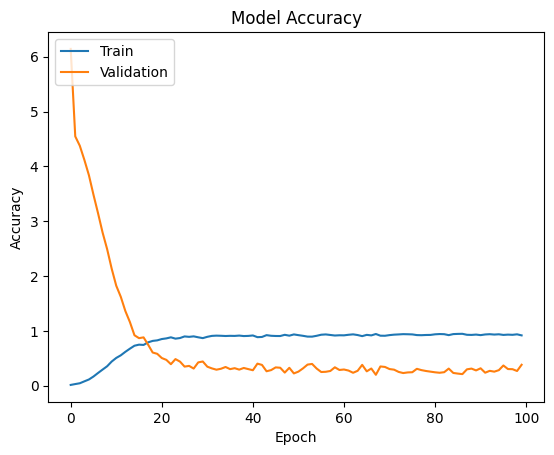

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_images, y_test_encoded, verbose=0)
print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.2387344241142273


manual test test3-alan-r.jpeg
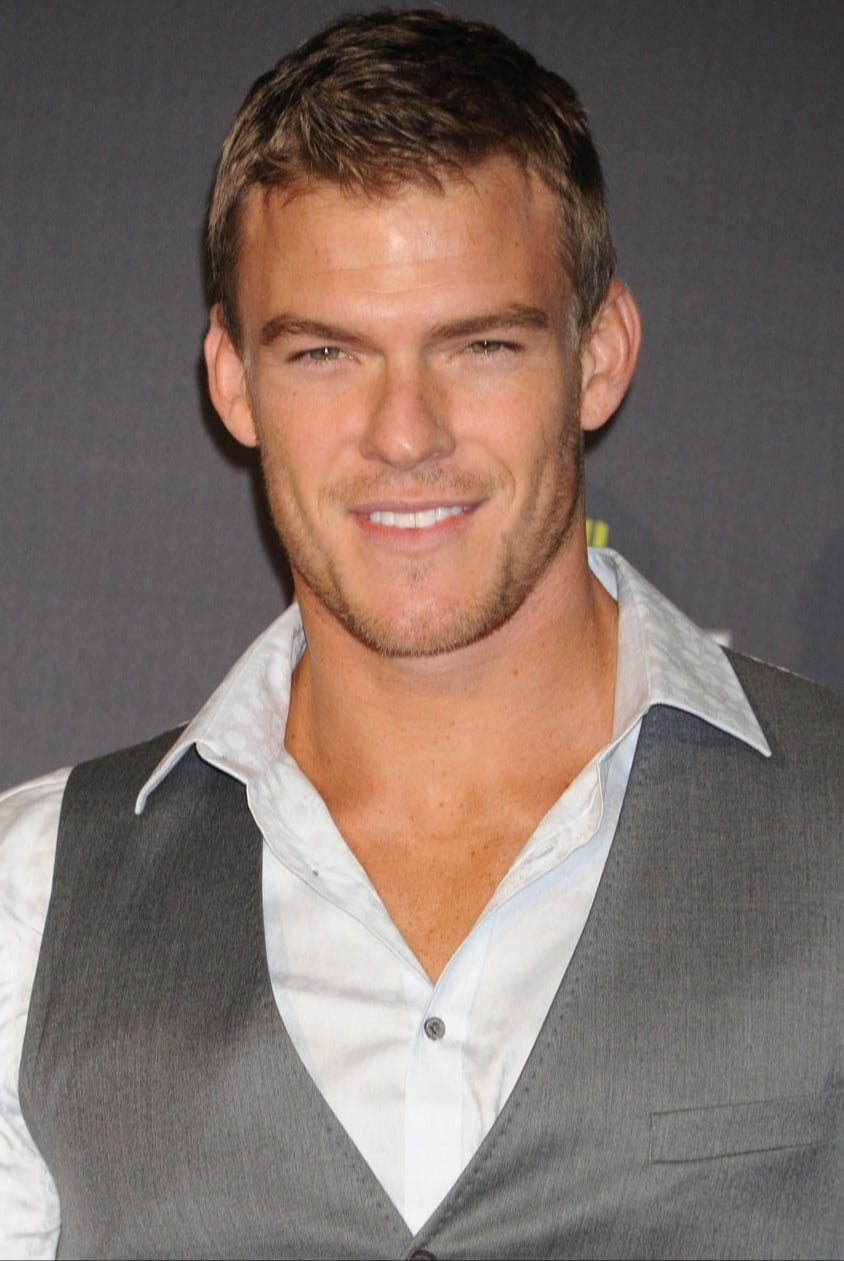

In [ ]:
#test_input=get_cropped_faces('/content/drive/MyDrive/CSCI6515_Project_dataset/project_dataset_ml_6515/hollywood/Alexandra Daddario/13.jpeg')

test_input=get_cropped_faces('/content/test3-alan-r.jpeg')

faces detected: 1


In [ ]:
test_input=np.array(test_input)

In [ ]:
test_input.shape

(1, 381, 381, 3)

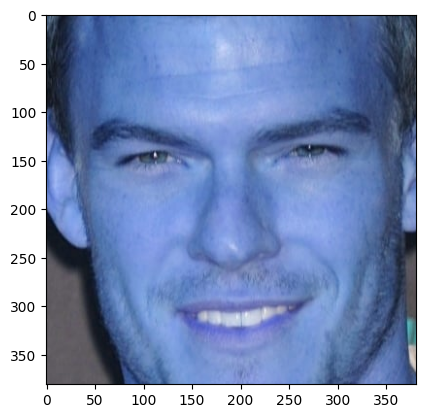

In [ ]:
plt.imshow(test_input[0])

In [ ]:
test_input=cv2.resize(test_input[0], (32, 32))

In [ ]:
test_input = np.array(test_input)


In [ ]:
test_input.shape

(32, 32, 3)

In [ ]:
test_input.reshape(-1,32,32,3)
test_input=np.expand_dims(test_input, axis=0)

In [ ]:
predictions=model.predict(test_input)

1/1 [==============================] - 0s 24ms/step


In [ ]:
predicted_class_index = np.argmax(predictions)


In [ ]:
for k,v in class_dict.items():
  if v==predicted_class_index:
    print(k)
    break

Alan Ritchson


**Descriptive Analysis:**

Steps show the result of effective recognition of image of Alex Richtson on providing an unkown image manually.

#### Pipeline for training SVM, Random Forest and Linear Regression Model

In [ ]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
X = np.array(X).reshape(4169, 3072).astype(float)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

**Descriptive Analysis:**

Creating model with possible parameters for hyperparameter tuning to find best model through running pipeline.

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.269041,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.069101,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.262960,{'logisticregression__C': 1}


**Descriptive Analysis:**

Best scores hyperparameter tuning running grid search over all the provided models.

In [ ]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

### 3.3 Model evaluation

#### SVM

In [ ]:
best_estimators['svm'].score(X_test,y_test)


0.28954937679769893

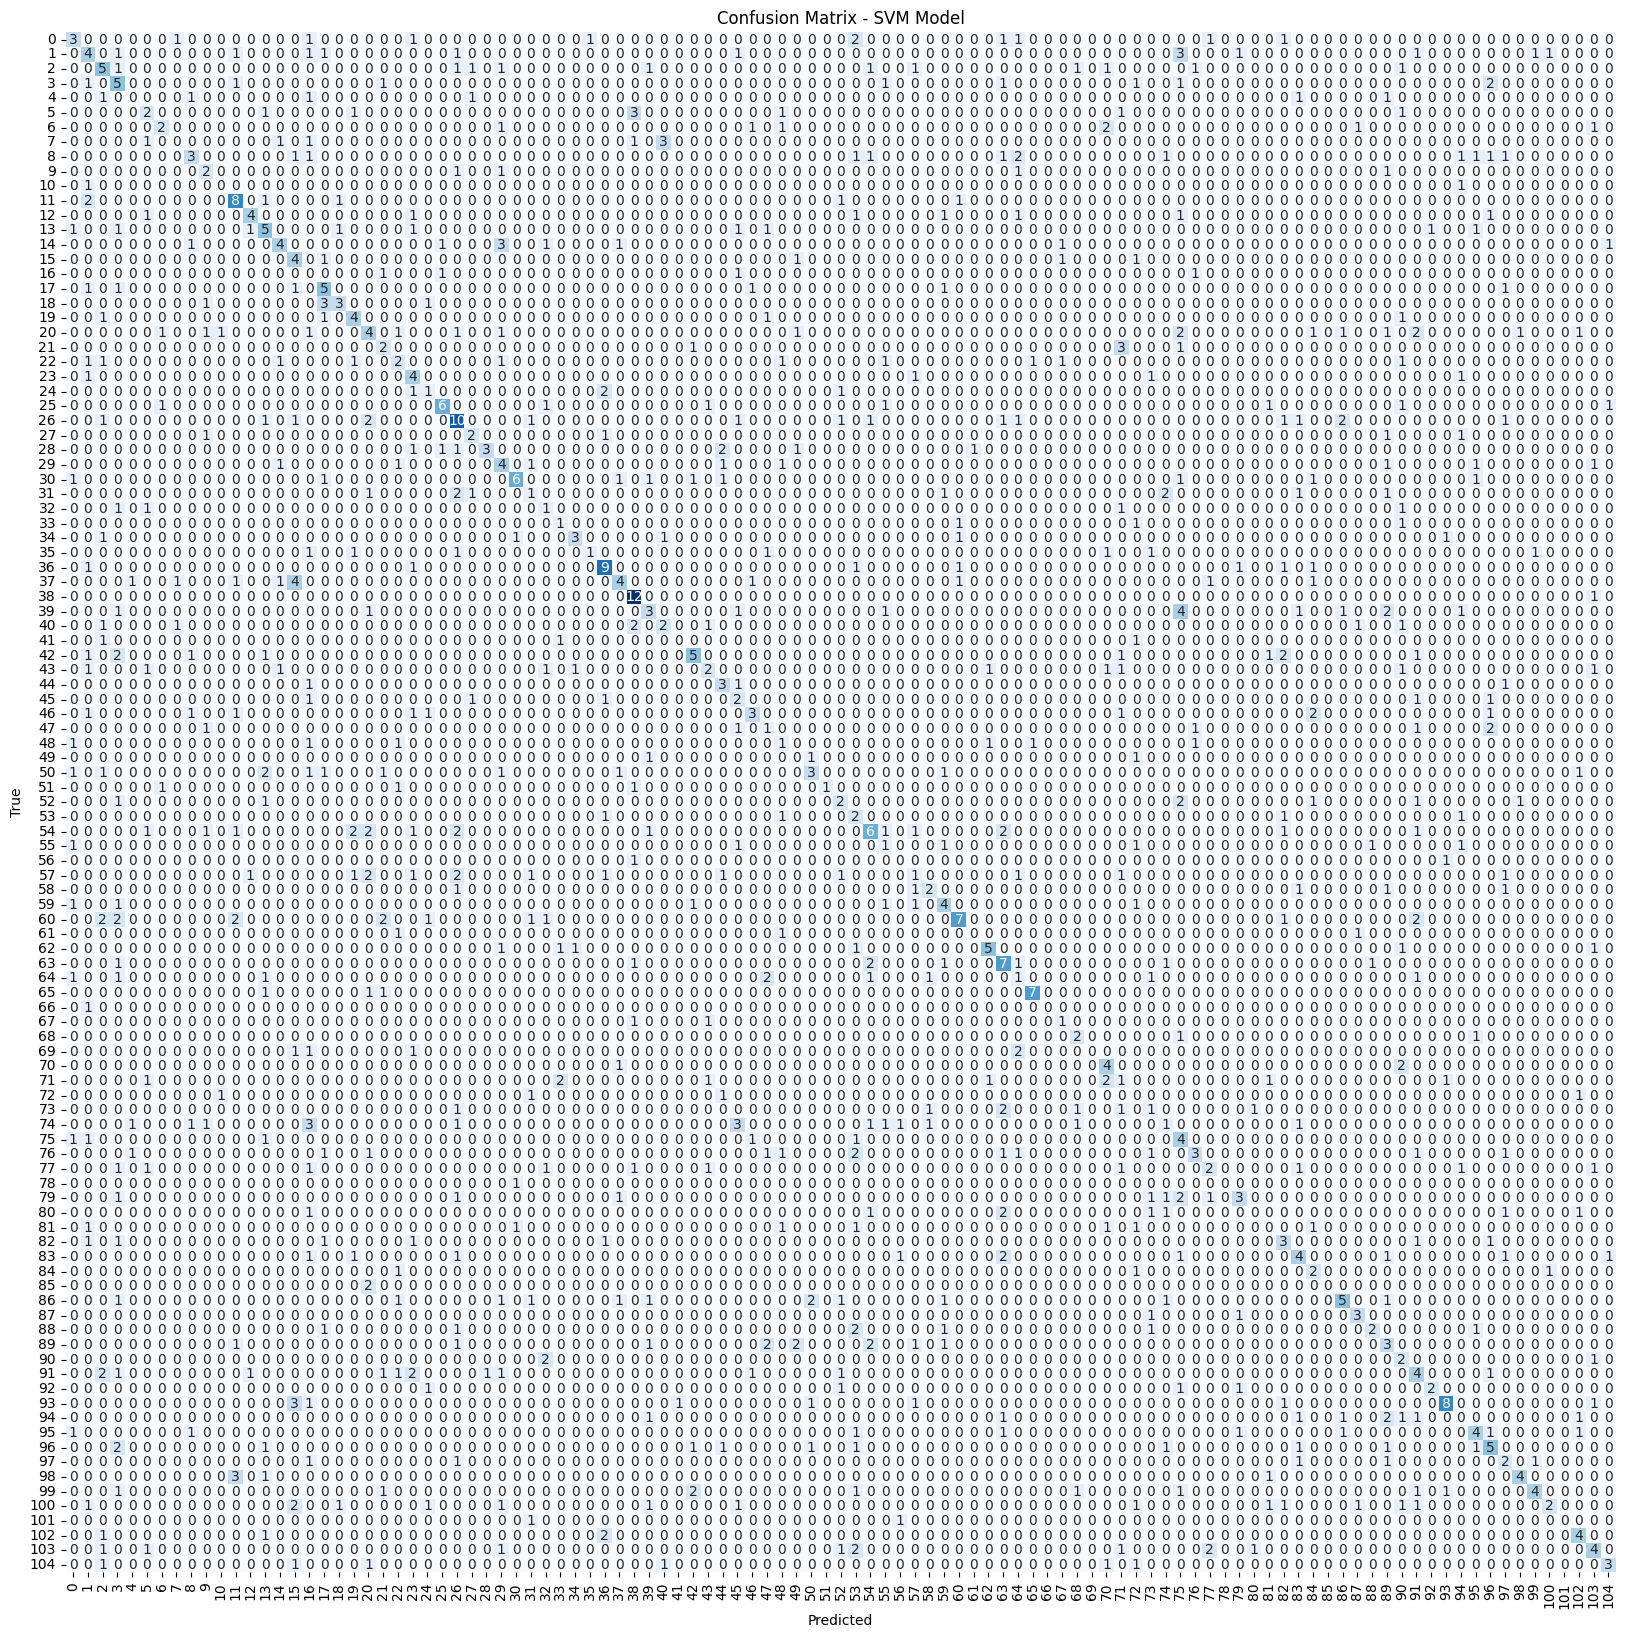

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_svm = best_estimators['svm'].predict(X_test)


cm_svm = confusion_matrix(y_test, y_pred_svm)


plt.figure(figsize=(20, 20 ))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - SVM Model")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.23      0.24        13
           1       0.20      0.24      0.22        17
           2       0.25      0.31      0.28        16
           3       0.19      0.36      0.24        14
           4       0.00      0.00      0.00         6
           5       0.20      0.20      0.20        10
           6       0.40      0.22      0.29         9
           7       0.00      0.00      0.00         7
           8       0.33      0.20      0.25        15
           9       0.25      0.33      0.29         6
          10       0.00      0.00      0.00         2
          11       0.42      0.57      0.48        14
          12       0.57      0.36      0.44        11
          13       0.28      0.36      0.31        14
          14       0.44      0.31      0.36        13
          15       0.22      0.50      0.31         8
          16       0.00      0.00      0.00         4
    

/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

#### Random Forest

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)


0.06711409395973154

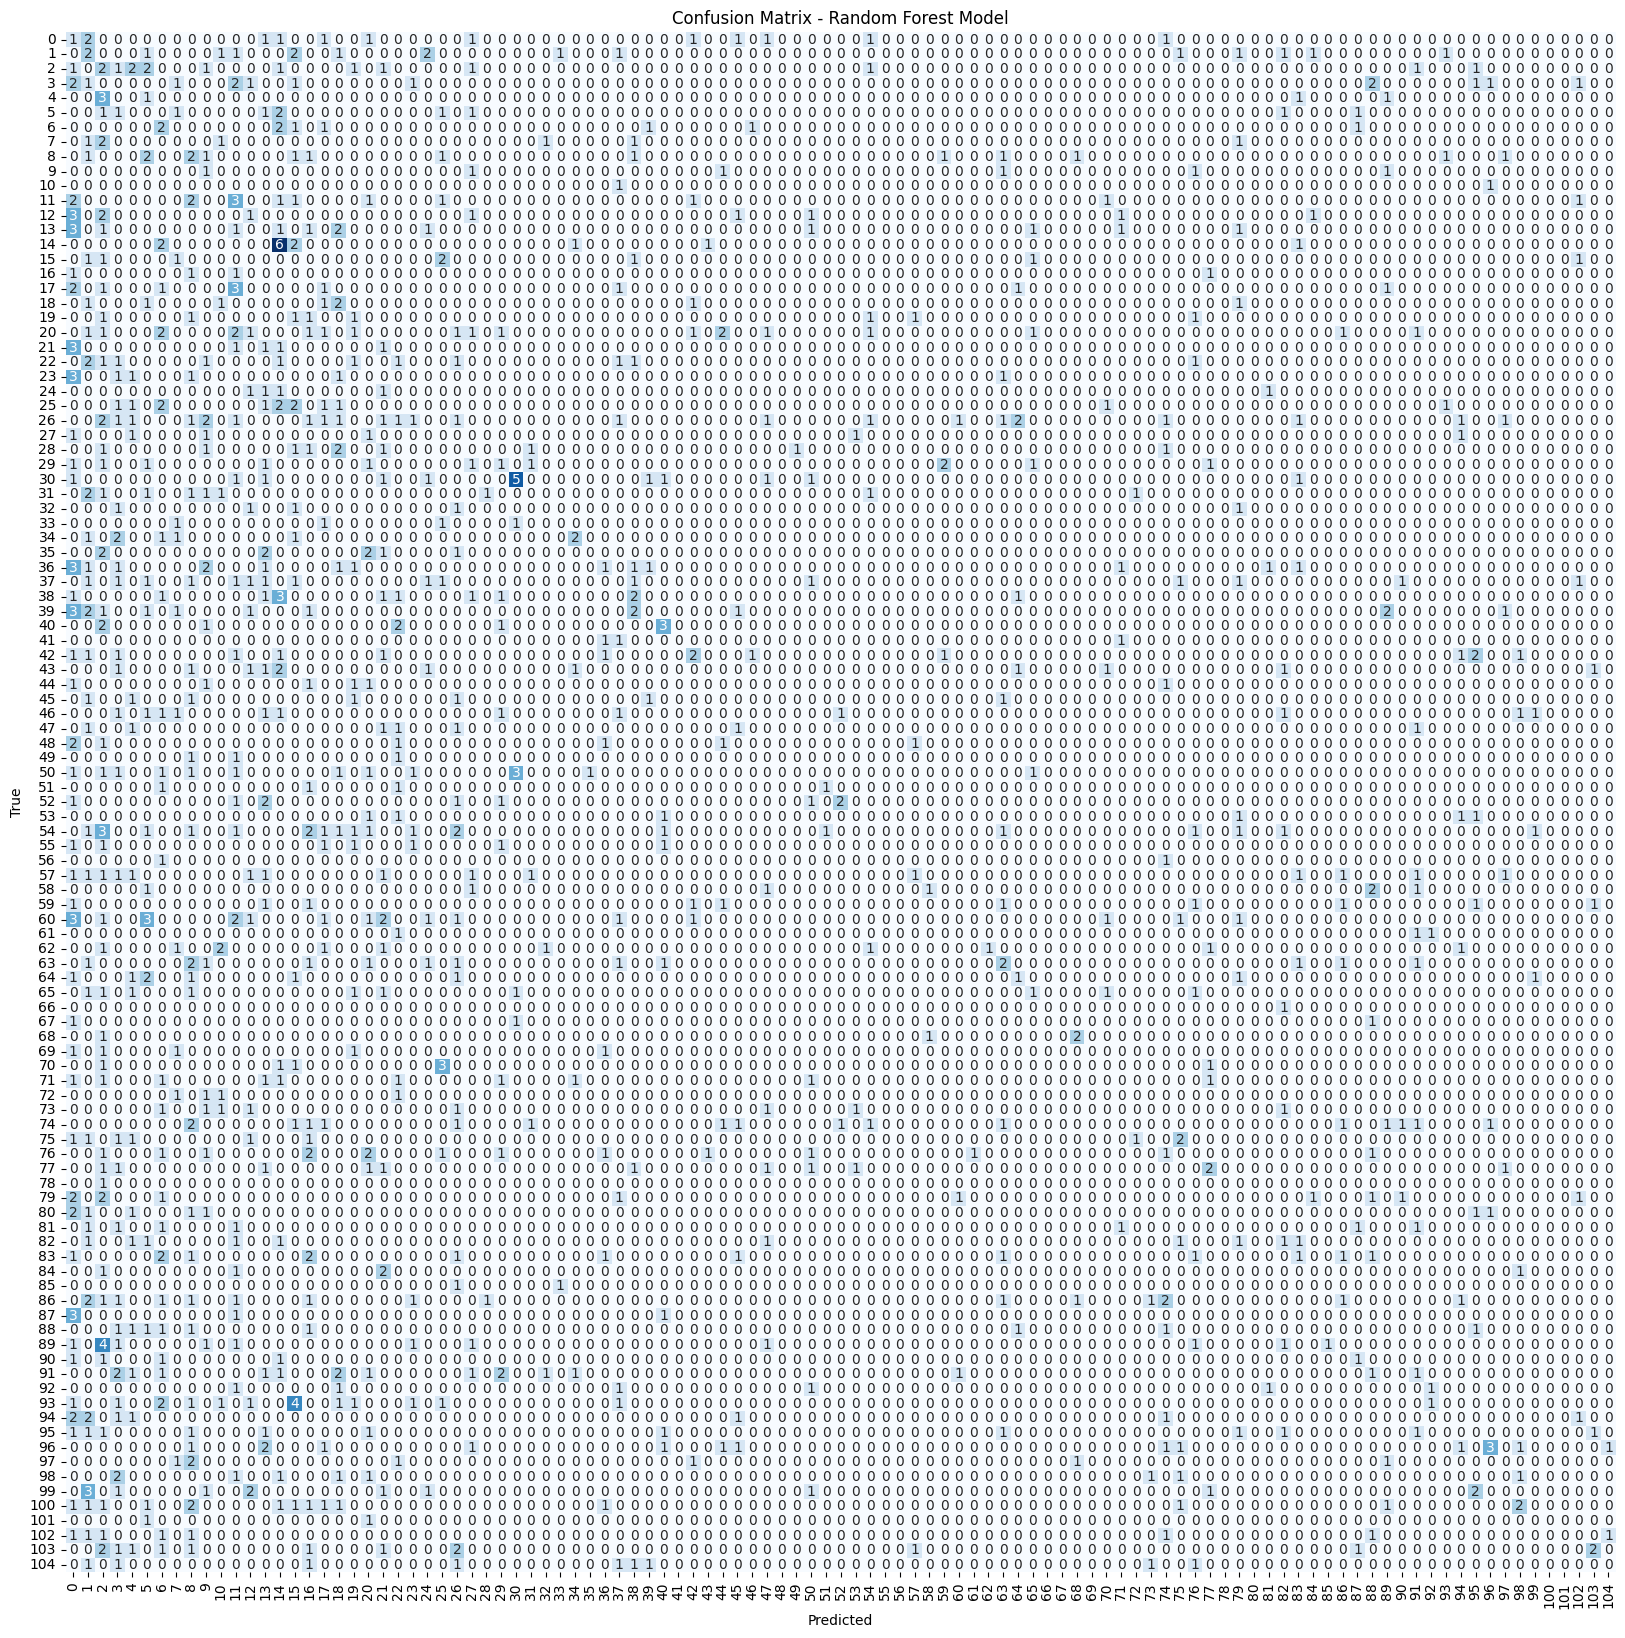

In [ ]:
y_pred_rf = best_estimators['random_forest'].predict(X_test)


cm_rf = confusion_matrix(y_test, y_pred_rf)


plt.figure(figsize=(20, 20))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.08      0.03        13
           1       0.05      0.12      0.07        17
           2       0.04      0.12      0.05        16
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        10
           6       0.07      0.22      0.10         9
           7       0.00      0.00      0.00         7
           8       0.06      0.13      0.08        15
           9       0.05      0.17      0.08         6
          10       0.00      0.00      0.00         2
          11       0.09      0.21      0.13        14
          12       0.07      0.09      0.08        11
          13       0.00      0.00      0.00        14
          14       0.18      0.46      0.26        13
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00         4
    

/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

#### Logistic Regression

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.2943432406519655

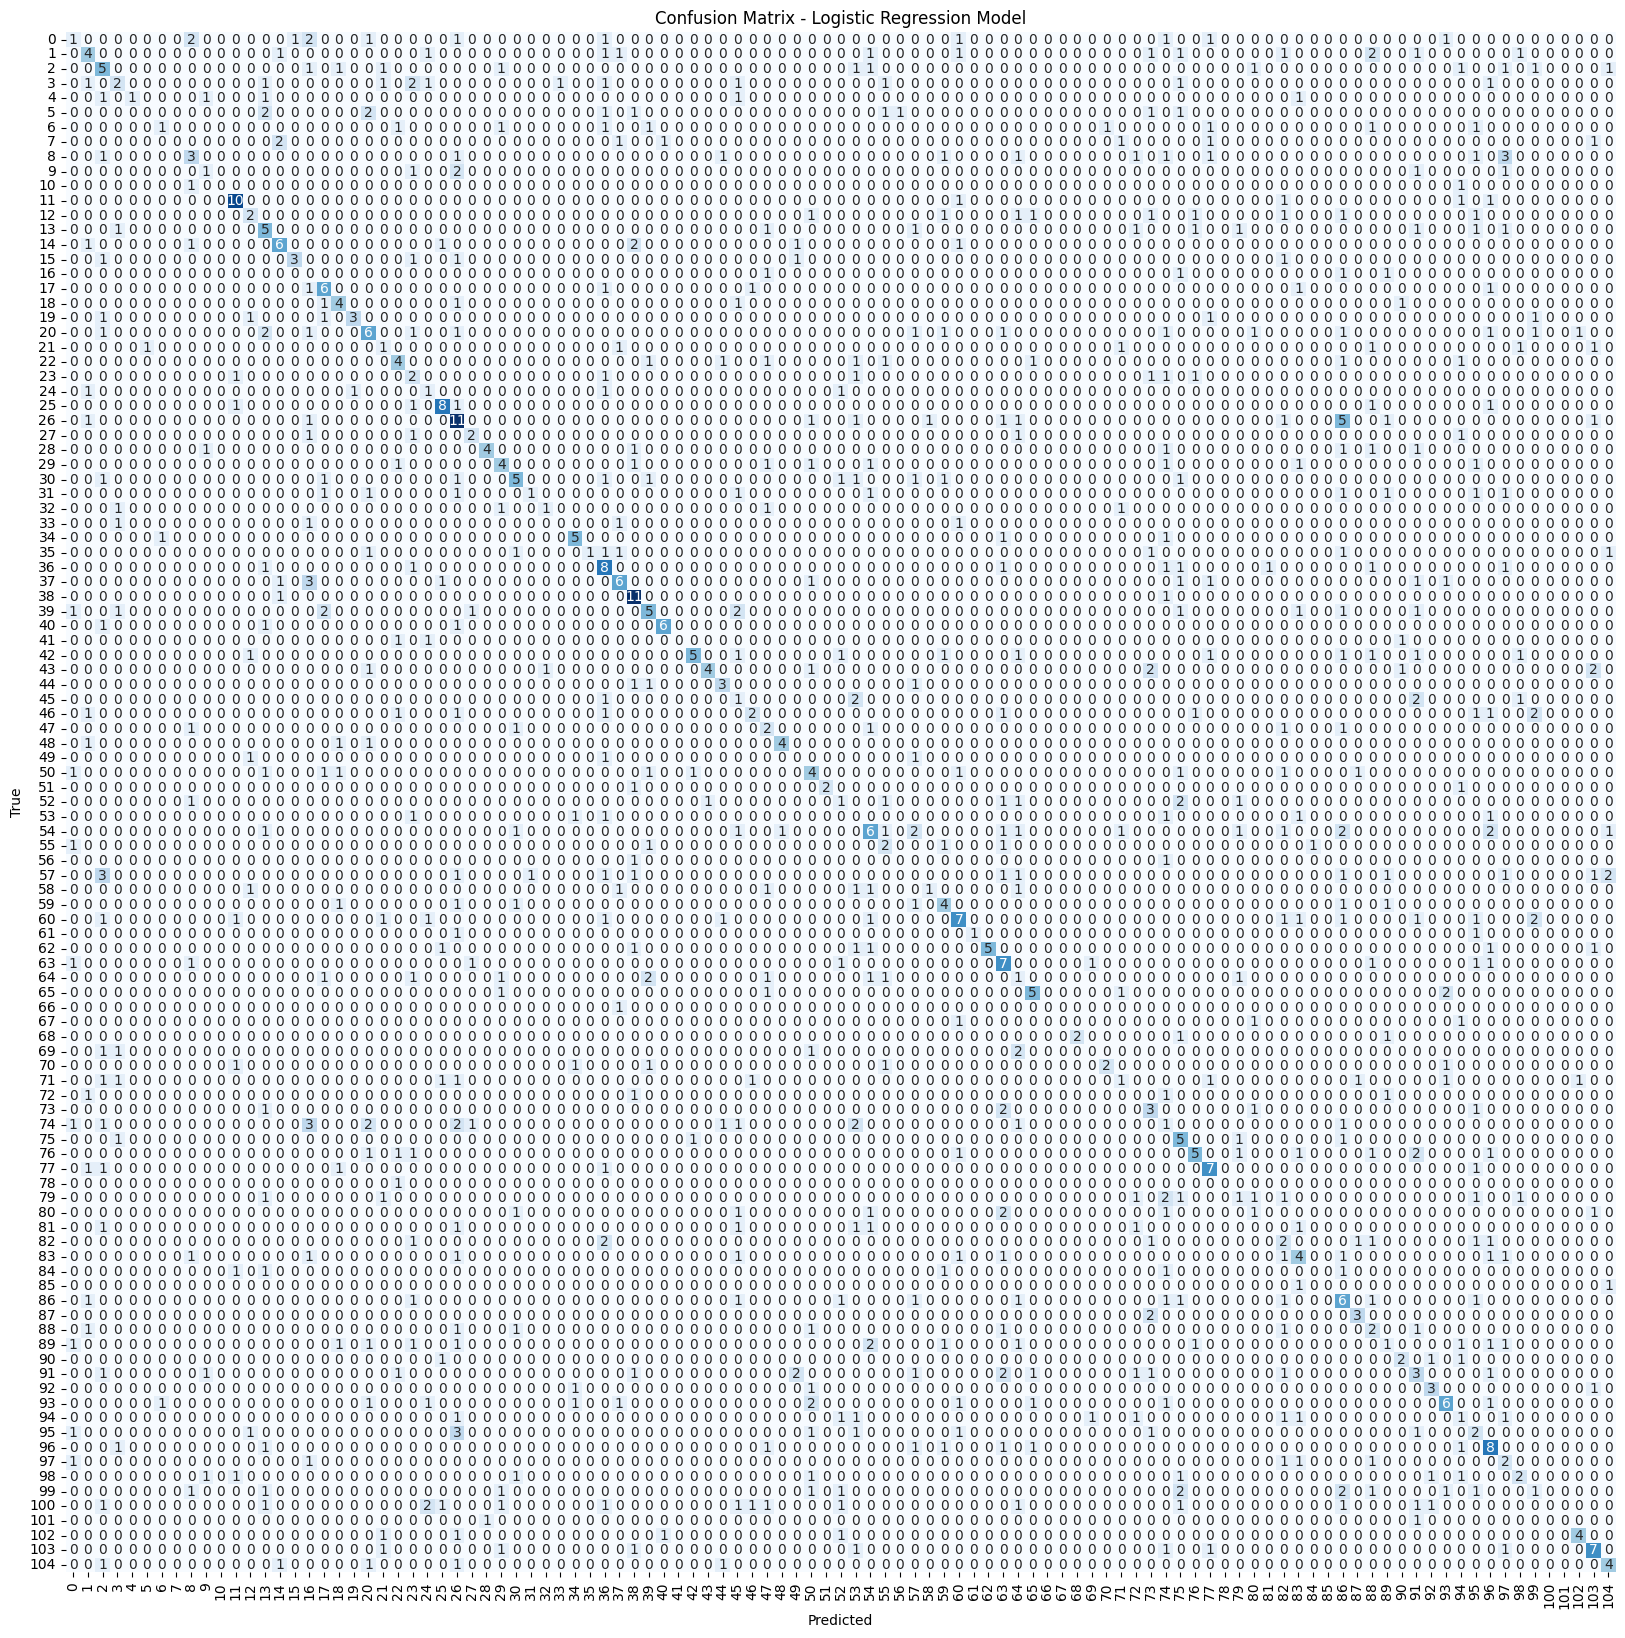

In [ ]:
y_pred_lr = best_estimators['logistic_regression'].predict(X_test)

# Create a confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(20, 20))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression Model")
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.08      0.09        13
           1       0.29      0.24      0.26        17
           2       0.21      0.31      0.25        16
           3       0.20      0.14      0.17        14
           4       1.00      0.17      0.29         6
           5       0.00      0.00      0.00        10
           6       0.33      0.11      0.17         9
           7       0.00      0.00      0.00         7
           8       0.25      0.20      0.22        15
           9       0.20      0.17      0.18         6
          10       0.00      0.00      0.00         2
          11       0.62      0.71      0.67        14
          12       0.29      0.18      0.22        11
          13       0.24      0.36      0.29        14
          14       0.50      0.46      0.48        13
          15       0.75      0.38      0.50         8
          16       0.00      0.00      0.00         4
    

/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

#### CNN

 1/33 [..............................] - ETA: 0s

33/33 [==============================] - 0s 5ms/step


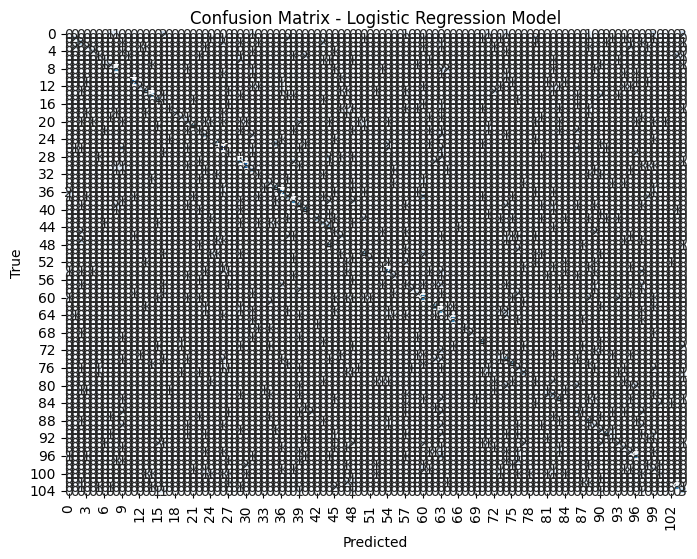

In [ ]:
# learning rate of cnn graph
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(X_test_images)
y_pred = np.argmax(y_pred, axis=1)
y_pred

#plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

#plotting confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression Model")
plt.show()



### 3.4 Analysis

In [ ]:
y_pred_cnn = model.predict(X_test_images)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred_cnn, axis=1)
y_true_classes = np.argmax(y_dc_test_encoded, axis=1)

# Create a confusion matrix
cm_cnn = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=range(19), yticklabels=range(19))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [168]:
def plot_classwise_bar(model_name, y_true, y_pred):
    y_true = [int(label) for label in y_true]
    y_pred = [int(label) for label in y_pred]
    num_classes = len(set(y_true))

    report = classification_report(y_true, y_pred, output_dict=True)

    metrics_dict = {
        'Precision': [report[str(i)]['precision'] if str(i) in report else 0 for i in range(num_classes)],
        'Recall': [report[str(i)]['recall'] if str(i) in report else 0 for i in range(num_classes)],
        'F1-Score': [report[str(i)]['f1-score'] if str(i) in report else 0 for i in range(num_classes)]
    }

    metrics_df = pd.DataFrame(metrics_dict, index=[str(i) for i in range(num_classes)])

    # Plot class-wise bar plots
    plt.figure(figsize=(16, 10))
    metrics_df.plot(kind='bar', colormap='viridis', edgecolor='black')
    plt.title(f'Class-wise Metrics - {model_name}')
    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.legend(loc='upper right')
    plt.show()

/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

<Figure size 1600x1000 with 0 Axes>

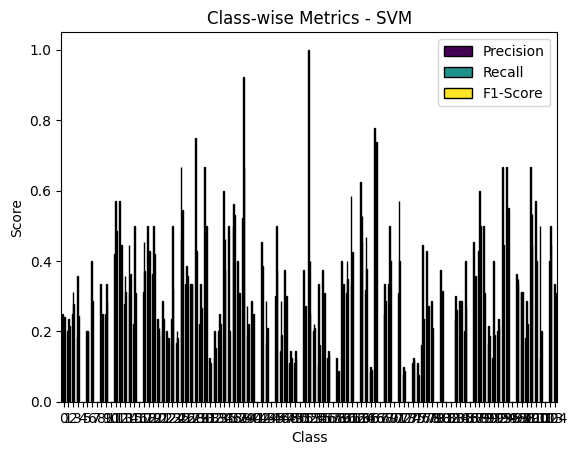

In [169]:
plot_classwise_bar('SVM', y_test, y_pred_svm)

/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

<Figure size 1600x1000 with 0 Axes>

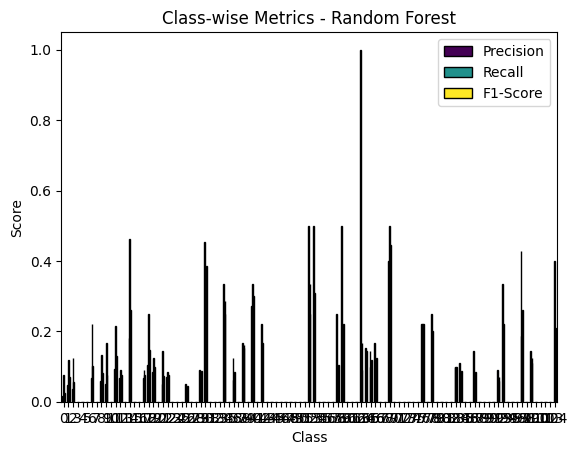

In [170]:
plot_classwise_bar('Random Forest', y_test, y_pred_rf)

/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/enigma/Documents/Dal/ML for BigData/Project/Hollywood/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

<Figure size 1600x1000 with 0 Axes>

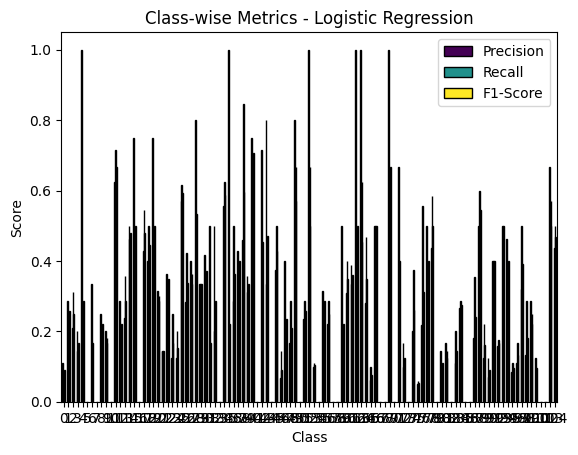

In [171]:
plot_classwise_bar('Logistic Regression', y_test, y_pred_lr)

/Users/kushsutaria/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushsutaria/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushsutaria/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Us

<Figure size 1200x800 with 0 Axes>

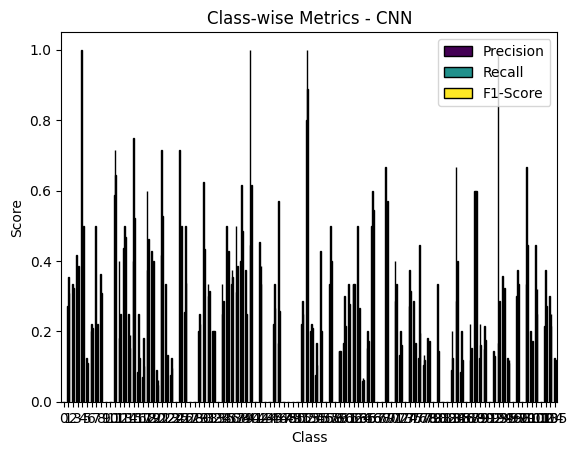

In [ ]:
import numpy as np
plot_classwise_bar('CNN', y_true_classes, y_pred_classes)

**Descriptive Analysis:**

**SVM:**

        Accuracy: 29%
Key Observations:
The precision, recall, and F1-score vary across classes.
Some classes have better performance, while others have lower scores.

**Random Forest:**

        Accuracy: 7%
Key Observations:
Similar to SVM, the precision, recall, and F1-score vary across classes.
The model struggles with several classes, resulting in low overall performance.

**Logistic Regression:**

        Accuracy: 16%
Key Observations:
Again, a variation in performance across classes.
Some classes have higher scores, while others have lower precision, recall, and F1-score.


**Conclusion:**

The overall accuracy of the models is relatively low. The main reason for this is data quality and the lack of resources for performing better hyperparameter tuning. Additionally, the models arefailing to generalize due to a lot of classes.